In [17]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [18]:
df = df[df['job_title_short'] == 'Data Engineer']
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,None,NaN,NaN,Zitec,"[sql, nosql, gcp, azure, aws, bigquery, databr...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785729,Data Engineer,Data Engineer Marketing Intelligence,Jerman,melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,IU Internationale Hochschule,None,None
785730,Data Engineer,"Data Center Engineering Operations Engineer , ...","Bangkok, Thailand",melalui LinkedIn,Pekerjaan tetap,False,Thailand,2023-03-12 06:37:47,False,False,Thailand,None,NaN,NaN,Amazon Web Services (AWS),"[excel, word, outlook]","{'analyst_tools': ['excel', 'word', 'outlook']}"
785731,Data Engineer,Data Engineer,"Overland Park, Kansas, Amerika Serikat",melalui LinkedIn,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:17,False,False,Sudan,None,NaN,NaN,Shamrock Trading Corporation,"[nosql, mongodb, mongodb, python, elasticsearc...","{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
785732,Data Engineer,Data Engineer (f/m/d),"Heidelberg, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,False,False,Germany,None,NaN,NaN,Heidelberg Materials,"[python, c#, java, scala, sql, postgresql, sql...","{'cloud': ['azure', 'databricks'], 'databases'..."


In [19]:
df_exploded = df.explode('job_skills')
df_exploded.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,python,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,sql,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,c#,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,azure,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,airflow,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [20]:
df_exploded.groupby('job_skills').size().sort_values(ascending=False).head(10)

job_skills
sql           113130
python        108022
aws            62049
azure          60674
spark          53656
java           35559
kafka          29073
hadoop         28815
scala          28716
databricks     27477
dtype: int64

In [21]:
skills_count = df_exploded.groupby('job_skills').agg(
    skills_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
) .sort_values(by='skills_count', ascending=False).head(10)

skills_count

,skills_count,median_salary
job_skills,,
sql,113130,125000.0
python,108022,125000.0
aws,62049,130000.0
azure,60674,125000.0
spark,53656,134775.0
java,35559,134241.0
kafka,29073,140000.0
hadoop,28815,134241.0
scala,28716,137500.0


C:\Users\pawan\AppData\Local\Temp\ipykernel_4256\2053907854.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(skill, (skills_count['skills_count'][i], skills_count['median_salary'][i]),


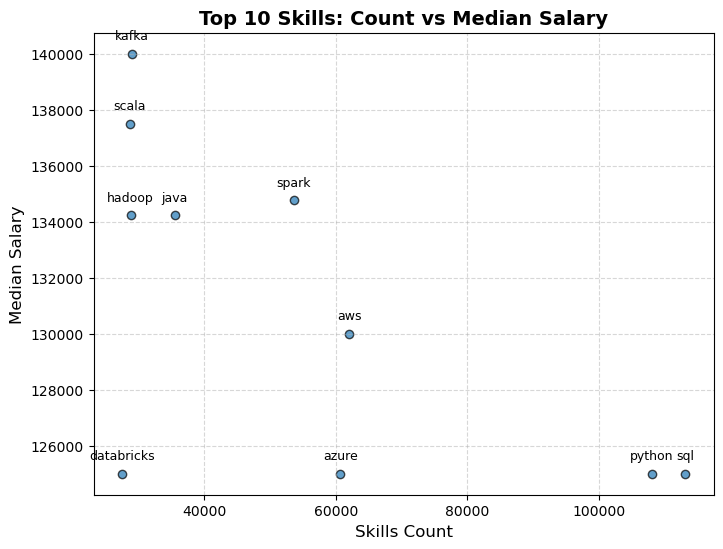

In [22]:

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(skills_count['skills_count'], skills_count['median_salary'], alpha=0.7, edgecolor='k')

# Titles and labels
plt.title("Top 10 Skills: Count vs Median Salary", fontsize=14, weight='bold')
plt.xlabel("Skills Count", fontsize=12)
plt.ylabel("Median Salary", fontsize=12)

# Grid for readability
plt.grid(True, linestyle="--", alpha=0.5)

# Annotate points with skill names
for i, skill in enumerate(skills_count.index):
    plt.annotate(skill, (skills_count['skills_count'][i], skills_count['median_salary'][i]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# Show chart
plt.show()
